In [3]:
from algorithms.AgglomerativeAlgorithm import AgglomerativeAlgorithm
from algorithms.BallsAlgorithm import BallsAlgorithm
from algorithms.FurthestAlgorithm import FurthestAlgorithm
from algorithms.LocalSearchAlgorithm import LocalSearch
from algorithms.SamplingAlgorithm import SamplingAlgorithm
from algorithms.BestClusteringAlgorithm import BestClustering
from algorithms.utils import getPairWiseDistance
import pandas as pd
import numpy as np

# Testing our algorithms on a simple dataset

In [4]:
data = pd.read_csv("data/testClusters.csv", delimiter=",", header=None)

In [5]:
data

,0,1,2
0,1,1,1
1,1,2,2
2,2,1,1
3,2,2,2
4,3,3,3
5,3,4,3


In [6]:
ag = AgglomerativeAlgorithm(data.values)
ag.run()

array([1, 2, 1, 2, 3, 3])

In [7]:
ba = BallsAlgorithm(data.values, 0.4)
ba.run()

array([1, 2, 1, 2, 3, 3])

In [8]:
bestAlgo = BestClustering(data.values)
bestAlgo.run()

array([1, 2, 1, 2, 3, 3])

In [9]:
ls = LocalSearch(data.values)
ls.run()

[1, 2, 1, 2, 3, 3]

# Clustering Categorical Data

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import homogeneity_score

In [11]:
mush = pd.read_csv("data/mushrooms.csv", delimiter=",")
mush = mush.apply(lambda x: pd.factorize(x)[0])

In [12]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


In [13]:
mushData = mush.drop("class", axis=1)[-1000:]

In [14]:
labels=mush["class"].values[-1000:]
labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,

In [44]:
predictedLabels = np.zeros((len(mushData),8), dtype=np.int)

In [45]:
for i in range(0,8):
    clustering = KMeans(n_clusters=i+2, random_state=0).fit(mushData)
    predictedLabels[:,i]=clustering.labels_
    print("Kmeans with " + str(i+2) + " clusters " + str(adjusted_rand_score(clustering.labels_, labels)))

Kmeans with 2 clusters 0.0767712561728798
Kmeans with 3 clusters 0.02891914978969928
Kmeans with 4 clusters 0.03805485791838537
Kmeans with 5 clusters 0.015249273570583591
Kmeans with 6 clusters 0.016474140684336155
Kmeans with 7 clusters 0.018407422657397865
Kmeans with 8 clusters 0.014211599962983202
Kmeans with 9 clusters 0.008851399837618297


In [17]:
def disagreementError(predictedLabels, newClustersList):
    costForCluster = 0
    nbrOfRows = len(predictedLabels)
    for i, clusterId in enumerate(newClustersList):
        for j in range(i + 1, nbrOfRows):
            if clusterId == newClustersList[j]:
                costForCluster += getPairWiseDistance(predictedLabels[i], predictedLabels[j])
            else:
                costForCluster += 1 - getPairWiseDistance(predictedLabels[i], predictedLabels[j])
    return costForCluster

In [18]:
clustering = SamplingAlgorithm(predictedLabels, FurthestAlgorithm, 100)
labelsFound = clustering.run()
disagreementError(predictedLabels, labelsFound)

60557.0

# Timeit 

In [19]:
import time


class TimerError(Exception):

    """A custom exception used to report errors in use of Timer class"""


class Timer:
    def __init__(self):
        self._start_time = None


    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")
        self._start_time = time.perf_counter()


    def stop(self):

        """Stop the timer, and report the elapsed time"""
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None

        print(f"Elapsed time: {elapsed_time:0.4f} seconds")

In [20]:
timer = Timer()

In [51]:
algorithmsToTest = [BestClustering, BallsAlgorithm, AgglomerativeAlgorithm, FurthestAlgorithm, LocalSearch]
for algo in algorithmsToTest:
    print(algo)
    timer.start()
    clustering = SamplingAlgorithm(predictedLabels, FurthestAlgorithm, 100)
    labelsFound = clustering.run()
    timer.stop()
    print(disagreementError(predictedLabels, labelsFound))

<class 'algorithms.BestClusteringAlgorithm.BestClustering'>
Elapsed time: 0.4046 seconds
57829.5
<class 'algorithms.BallsAlgorithm.BallsAlgorithm'>
Elapsed time: 0.3683 seconds
60557.0
<class 'algorithms.AgglomerativeAlgorithm.AgglomerativeAlgorithm'>
Elapsed time: 0.3809 seconds
57717.0
<class 'algorithms.FurthestAlgorithm.FurthestAlgorithm'>
Elapsed time: 0.3671 seconds
60477.0
<class 'algorithms.LocalSearchAlgorithm.LocalSearch'>
Elapsed time: 0.3649 seconds
57717.0


In [52]:
algorithmsToTest = [BestClustering, BallsAlgorithm, AgglomerativeAlgorithm, FurthestAlgorithm, LocalSearch]
for algo in algorithmsToTest:
    print(algo)
    timer.start()
    clustering = algo(predictedLabels)
    labelsFound = clustering.run()
    timer.stop()
    print(disagreementError(predictedLabels, labelsFound))

<class 'algorithms.BestClusteringAlgorithm.BestClustering'>
Elapsed time: 23.8093 seconds
57717.0
<class 'algorithms.BallsAlgorithm.BallsAlgorithm'>
Elapsed time: 1.8212 seconds
57797.0
<class 'algorithms.AgglomerativeAlgorithm.AgglomerativeAlgorithm'>
Elapsed time: 2.3028 seconds
57717.0
<class 'algorithms.FurthestAlgorithm.FurthestAlgorithm'>
Elapsed time: 3.3549 seconds
57717.0
<class 'algorithms.LocalSearchAlgorithm.LocalSearch'>
Elapsed time: 3.0644 seconds
79290.0


# Improving Clustering Robusteness

In [23]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [24]:
def plot_clusters(X, y=None, title=""):
    for label in np.unique(y):
        plt.scatter(X[y==label, 0], X[y==label, 1], s=4, label=label, cmap="winter")
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    plt.title(title)
    plt.legend()
    plt.figure(figsize=(8, 4))
    plt.show()

In [25]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1 ,  2.3],
     [-1.5,  1.8],
     [-1.5,  2.8],
     [-1.5,  1.3]])
blob_std = np.array([0.2, 0.1, 0.1, 0.1, 0.1])

In [26]:
X, y = make_blobs(n_samples=800, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

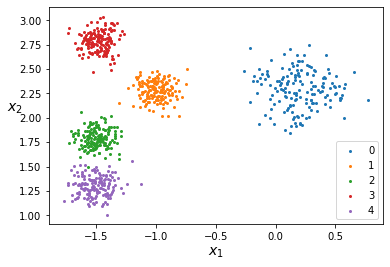

<Figure size 576x288 with 0 Axes>

In [27]:
plot_clusters(X, y)

In [28]:
from sklearn.datasets import make_moons

In [29]:
XMoons, yMoons = make_moons(n_samples=200, noise=0.1, random_state=16)
availableClusterId = max(y)+1
yMoons = np.where(yMoons==0, availableClusterId, yMoons)
availableClusterId += 1
yMoons = np.where(yMoons==1, availableClusterId, yMoons)

In [30]:
X = np.concatenate((X, XMoons), axis=0)
y = np.concatenate((y, yMoons), axis=0)

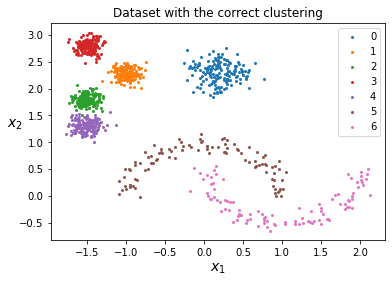

<Figure size 576x288 with 0 Axes>

In [31]:
plot_clusters(X, y, "Dataset with the correct clustering")

In [32]:
predictedLabels = np.zeros((len(X),5), dtype=np.int)

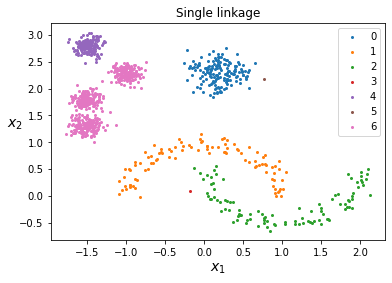

<Figure size 576x288 with 0 Axes>

0.9917272476872796

In [33]:
clustering = AgglomerativeClustering(n_clusters=7, linkage="single").fit(X)
predictedLabels[:,0]=clustering.labels_
plot_clusters(X, clustering.labels_, "Single linkage")
homogeneity_score(clustering.labels_, y)

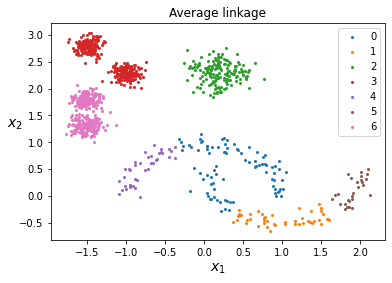

<Figure size 576x288 with 0 Axes>

0.8918240997340755

In [34]:
clustering = AgglomerativeClustering(n_clusters=7, linkage="average").fit(X)
predictedLabels[:,1]=clustering.labels_
plot_clusters(X, clustering.labels_, "Average linkage")
homogeneity_score(clustering.labels_, y)

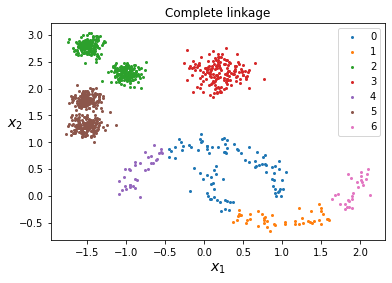

<Figure size 576x288 with 0 Axes>

0.8932512118693227

In [35]:
clustering = AgglomerativeClustering(n_clusters=7, linkage="complete").fit(X)
predictedLabels[:,2]=clustering.labels_
plot_clusters(X, clustering.labels_, "Complete linkage")
homogeneity_score(clustering.labels_, y)

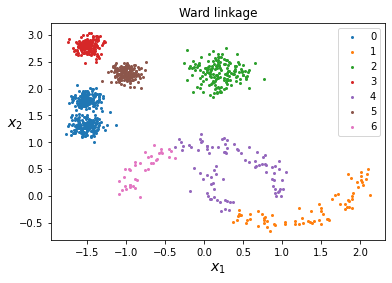

<Figure size 576x288 with 0 Axes>

0.929723876118782

In [36]:
clustering = AgglomerativeClustering(n_clusters=7, linkage="ward").fit(X)
predictedLabels[:,3]=clustering.labels_
plot_clusters(X, clustering.labels_, "Ward linkage")
homogeneity_score(clustering.labels_, y)

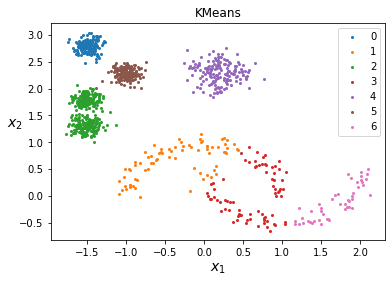

<Figure size 576x288 with 0 Axes>

0.9086549706893131

In [37]:
clustering = KMeans(n_clusters=7, random_state=0).fit(X)
predictedLabels[:,4]=clustering.labels_
plot_clusters(X, clustering.labels_, "KMeans")
homogeneity_score(clustering.labels_, y)

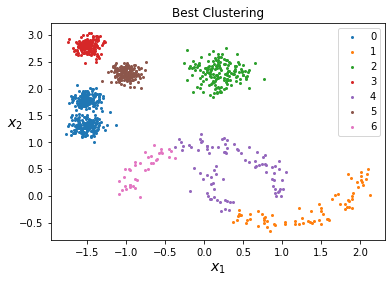

<Figure size 576x288 with 0 Axes>

0.929723876118782

In [38]:
clustering = BestClustering(predictedLabels)
labels = clustering.run()
plot_clusters(X, labels, "Best Clustering")
homogeneity_score(labels, y)

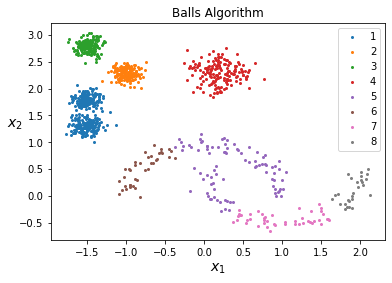

<Figure size 576x288 with 0 Axes>

0.9051936601711548

In [39]:
clustering = BallsAlgorithm(predictedLabels, 0.4)
labels = clustering.run()
plot_clusters(X, labels, "Balls Algorithm")
homogeneity_score(labels, y)

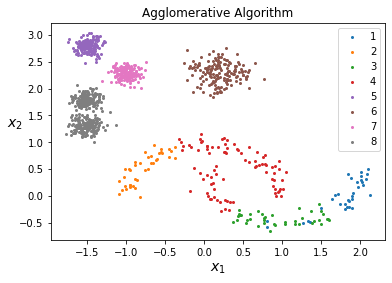

<Figure size 576x288 with 0 Axes>

0.9039070216208839

In [40]:
clustering = AgglomerativeAlgorithm(predictedLabels)
labels = clustering.run()
plot_clusters(X, labels, "Agglomerative Algorithm")
homogeneity_score(labels, y)

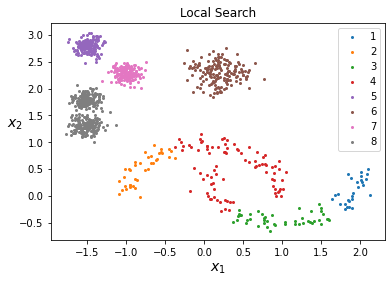

<Figure size 576x288 with 0 Axes>

0.9051936601711548

In [41]:
clustering = LocalSearch(predictedLabels, initialClustering=labels)
labels = clustering.run()
plot_clusters(X, labels, "Local Search")
homogeneity_score(labels, y)

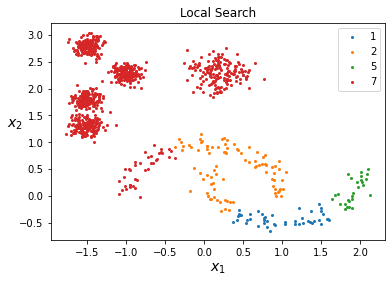

<Figure size 576x288 with 0 Axes>

0.7131765561589395

In [42]:
clustering = LocalSearch(predictedLabels, nbrOfClusters=7)
labels = clustering.run()
plot_clusters(X, labels, "Local Search")
homogeneity_score(labels, y)